In [1]:
#whole lotta inputs ASTRO RELated
#from astroquery.vizier import Vizier
#import astropy.units as u
#import pandas as pd

import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#import astropy.coordinates as coord
#import astropy.units as u
#import csv
#import astropy.io.ascii as ascii
#from astropy.table import Table, join, unique
import pandas as pd
import numpy as np



#import os
#import time
#import sys
#import shutil
#from datetime import datetime
#import math
#import matplotlib.cm as cm
#import matplotlib.patheffects as PathEffects
#import matplotlib.colors as pltcolors
#from matplotlib import gridspec
#import matplotlib.ticker as ticker
#import matplotlib.colors as csx
#import colorsys
#import colormaps as cmaps
#from scipy.stats import norm

#from astropy.stats import mad_std
#from astropy.io import fits
#from astropy.timeseries import LombScargle
#from astropy.coordinates import ICRS, SkyCoord, Galactic, Galactocentric, GalacticLSR, LSR, CartesianRepresentation
#import astropy.units as u
#import astropy.constants as c
#from astropy.table import Table

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#import astropy
#from astropy.visualization.wcsaxes import WCSAxes

#from collections import Counter
import warnings

#machine learning inputs

# Load in Data and make data cuts
- T-eff < 7000 to exclude high mass stars and most white dwarfs. 
- parallax > 1e-5
- G band Magnitude <18


In [2]:
colnames = [
    "starID",  #Assigned star ID
    "Gaia", #Star ID from Gaia catalog
    "Teff", #Effective temperature of the star (a derived quantity)
    "e_Teff", #Error in effective temperature
    "logg", #Log surface gravity
    "e_logg", #error in surface gravity
    "FeH", #Metallicity (ratio of iron to hydrogen)
    "e_FeH", #error in metallicity
    "Dist", #Distance to star
    "e_Dist", #Error in distance to star
    "Av", #Extintion of light along the line of sight 
    "e_Av", #error in extinction
    "Fbol", #Bolometric flux (integrated over all wavelengths)
    "e_Fbol", #Error in bolometric flux
    "angRad", #angular radius of star
    "e_angRad", #Error in angular radius
    "logL", #log bolometric luminosity
    "e_logL", #error in log luminosity
    "radius", #radius of the star
    "e_radius", #error in radius
    "npoint", #number of points in flux
    "source", #target source
    "ruwe", #Gaia weighted error
    "RAdeg", #RA coordinate in degrees
    "DEdeg", #DEC coordinate in degrees
    "GLON", #galactic latitude
    "GLAT", #galactic latitude
    "Uniq", #is it a unique point
    "BinarySource" #yes or no is it a binary source
]

# Read in the file — adjust `skiprows` to match your file (e.g., skip header block)
chunks = pd.read_csv("apjsacabc8t4_mrt.txt", names=colnames, sep=r"\s+", comment='#', engine='python', chunksize=50000)

In [3]:
del chunk
del df
del filtered_chunks

NameError: name 'chunk' is not defined

In [4]:
filtered_chunks=[]
for chunk in chunks:
    chunk = chunk[pd.to_numeric(chunk['Teff'], errors='coerce') < 9000]
    chunk = chunk.drop('BinarySource', axis=1)
    chunk["npoint"] = pd.to_numeric(chunk["npoint"], errors="coerce")
    chunk = chunk.dropna(subset=["npoint"])
    filtered_chunks.append(chunk)

df = pd.concat(filtered_chunks)

In [5]:
df.head()

,starID,Gaia,Teff,e_Teff,logg,e_logg,FeH,e_FeH,Dist,e_Dist,...,radius,e_radius,npoint,source,ruwe,RAdeg,DEdeg,GLON,GLAT,Uniq
59,131116000501002,4667368899326729856,4226.10,141.90,4.620,0.070,-0.130,0.120,142.844,0.187,...,0.608,0.049,16.0,GALAH_DR3,1.09,53.221178,-68.674790,284.403250,-42.173533,Y
61,131116000501004,4667324643983679744,4908.70,171.80,2.320,0.080,-1.180,0.190,3483.971,100.874,...,9.451,0.846,19.0,GALAH_DR3,0.93,55.593978,-68.697933,283.721464,-41.476288,Y
62,131116000501005,4667335913977929728,5560.00,153.30,4.070,0.060,0.020,0.100,800.286,10.866,...,1.716,0.120,19.0,GALAH_DR3,1.98,54.392074,-68.685000,284.059066,-41.833071,Y
63,131116000501006,4667323681911007232,5623.70,156.40,4.280,0.060,-0.030,0.110,411.509,4.184,...,1.315,0.092,19.0,GALAH_DR3,3.11,55.770496,-68.722452,283.697372,-41.410086,Y
64,131116000501007,4667323544472053888,6024.50,164.40,4.190,0.060,-0.350,0.150,549.269,10.376,...,1.421,0.102,19.0,GALAH_DR3,4.68,55.738304,-68.746178,283.732101,-41.405527,Y


In [6]:
df['Teff'] = pd.to_numeric(df['Teff'])
df['FeH'] = pd.to_numeric(df['FeH'])
df['logg'] = pd.to_numeric(df['logg'])

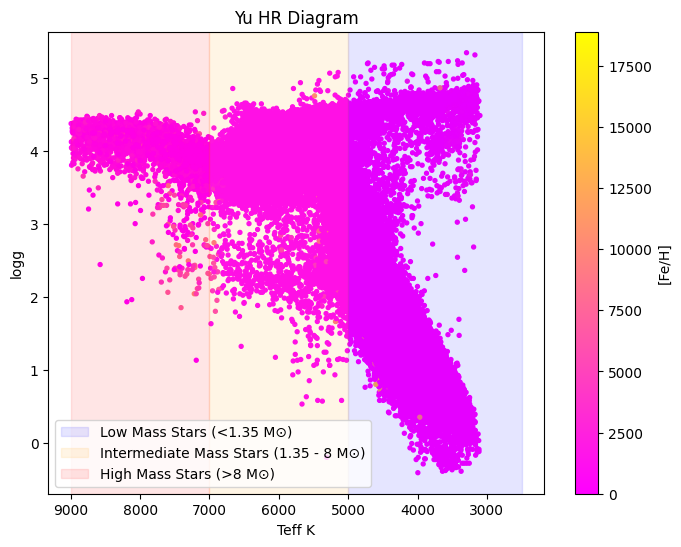

In [7]:
plt.figure(figsize=(8, 6))

sc = plt.scatter(df['Teff'].iloc[::5], df['logg'].iloc[::5], c=df['FeH'].iloc[::5], cmap='spring', s=8)
plt.colorbar(sc, label='[Fe/H]')
plt.gca().invert_xaxis()
plt.xlabel('Teff K')
plt.ylabel("logg")
# plt.ylim(-100,50e4)
plt.title("Yu HR Diagram")

#Hr diagram markers 
teff = df['Teff']
# Define mass boundaries (for example, in solar masses)
low_mass = (teff < 6450)  # Low mass stars have lower Teff (this is a rough example)
intermediate_mass = (teff >= 6550) & (teff < 7000)  # Intermediate mass
high_mass = (teff >= 7000)  # High mass stars

# Plot shaded regions for mass groups
plt.axvspan(2500, 5000, color='blue', alpha=0.1, label='Low Mass Stars (<1.35 M⊙)')
plt.axvspan(5000, 7000, color='orange', alpha=0.1, label='Intermediate Mass Stars (1.35 - 8 M⊙)')
plt.axvspan(7000, 9000, color='red', alpha=0.1, label='High Mass Stars (>8 M⊙)')

# # Annotating the regions (optional)
# plt.annotate('Low Mass Stars', xy=(4500, 5), xytext=(4500, 4.7),
#              arrowprops=dict(facecolor='blue', shrink=0.05), color='blue', fontsize=10)
# plt.annotate('Intermediate Mass Stars', xy=(6000, 4), xytext=(6000, 4.2),
#              arrowprops=dict(facecolor='orange', shrink=0.05), color='orange', fontsize=10)
# plt.annotate('High Mass Stars', xy=(18000, -2), xytext=(18000, -2.2),
#              arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=10)

# Show the plot
plt.legend()
plt.show()

In [9]:
df.to_csv('GALAH_APOGEE_RAVE.csv', index=False)

In [ ]:
#Cluster data
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.cluster_centers_